# Titanic - Machine Learning From Disaster

## About
Analysis by Sondra Hoffman

Date: January 13, 2024

https://www.sondrahoffman.online


### Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1,502 out of 2,224 passengers and crew. This tragedy has led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. In this analysis, we will explore what sorts of people were likely to survive. In particular, we will apply the tools of machine learning to predict which passengers survived the tragedy.

### Goal
The goal of this analysis is to predict which passengers survived the sinking of the Titanic using machine learning techniques. The analysis will involve data cleaning, exploratory data analysis, feature engineering, and predictive modeling. The accuracy of the model will be evaluated using the area under the receiver operating characteristic curve (AUC). The final model will be used to make predictions on the test dataset provided by Kaggle.

### Methodology
The analysis was conducted using Python 3.8.5. The data was cleaned and preprocessed using the Pandas library. Exploratory data analysis was conducted using the Matplotlib and Seaborn libraries. Feature engineering was performed to create new features that could potentially improve the predictive power of the model. The predictive model was built using the Scikit-learn and XGBoost libraries. 

### Results
The XGBoost model achieved an accuracy rate of 81%, which is good. The accuracy can be improved with further enhancements of the model and more feature engineering. The final model was used to make predictions on the training dataset provided by Kaggle. The predictions have not been submitted to Kaggle or measured using the Kaggle scoring system. The analysis will be enhanced prior to submitting to Kaggle. 

### Description
Titanic - Machine Learning From Disaster is about predicting the survival of passengers on the Titanic using machine learning techniques. The analysis was originally completed using R. Translating the analysis from R to Python was achieved with the help of the custom GPT called Data Analyst powered by ChatGPT-4. Kaggle has provided the datasets for training and testing and a link is provided below. The datasets appear to be a sample of the population from the voyage. This analysis assumes the sample is representative of the population.

### Data Dictionary
- PassengerId: Identifier for each passenger.
- Survived: Survival status (0 = No, 1 = Yes).
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
- Name: Name of the passenger.
- Sex: Gender of the passenger.
- Age: Age in years.
- SibSp: Number of siblings/spouses aboard the Titanic.
- Parch: Number of parents/children aboard the Titanic.
- Ticket: Ticket number.
- Fare: Passenger fare.
- Cabin: Cabin number.
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Data source url https://www.kaggle.com/competitions/titanic/data

### Packages
Compiled on a Linux system using Python 3.8.5, the following libraries were used to conduct the analysis:

- Pandas
- NumPy
- Matplotlib
- Seaborn
- Scikit-learn
- XGBoost

## Data Wrangling

In [12]:
import pandas as pd

# Load the Titanic training dataset
file_path = '~/Documents/R_Examples/TitanicSurvivalAnalysis/TrainDataSet/TitanicSurvivalTrainData'
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Check for missing values in each column
missing_values = titanic_data.isnull().sum()
missing_values[missing_values > 0]


Age         177
Cabin       687
Embarked      2
dtype: int64

The dataset has missing values in three columns:

- **Age:** 177 missing values
- **Cabin:** 687 missing values
- **Embarked:** 2 missing values

We'll handle these as follows:

- **Age:** We can impute the missing ages. A common approach is to use the median age, but we could also consider using the median age within specific groups (e.g., classified by class or gender) for a more accurate imputation.
- **Cabin:** With 687 missing values out of 891 total entries, this column has a significant amount of missing data. We might consider dropping it, or we could derive a simpler feature, like whether a cabin was assigned or not.
- **Embarked:** Only 2 missing values. We can fill these with the most common point of embarkation.

Let's proceed with this data wrangling. We'll also convert categorical variables like 'Sex' and 'Embarked' into numerical formats for easier analysis later on.



In [14]:
# Data cleaning and preparation

# Impute missing Age values with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Convert 'Cabin' to a binary feature (1 if cabin is assigned, 0 otherwise)
titanic_data['Cabin'] = titanic_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Impute missing 'Embarked' values with the most common port
most_common_port = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(most_common_port, inplace=True)

# Convert 'Sex' into a numerical format (0 for male, 1 for female)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Re-check for missing values
missing_values_after = titanic_data.isnull().sum()
missing_values_after[missing_values_after > 0]


Series([], dtype: int64)

The missing values have been addressed:

- Age missing values were filled with the median age.
- Cabin was transformed into a binary feature (1 if a cabin is assigned, 0 otherwise).
- Embarked missing values were filled with the most common port.
- Sex was converted into a numerical format (0 for male, 1 for female).

There are no more missing values in the dataset.

## Exploratory Analysis
Here we will look at the relationship between various features (like gender, class, age, and fare) and survival. First, we will start by exploring the relationship between gender and survival using the Python packages 'matplotlib' and 'seaborn'.

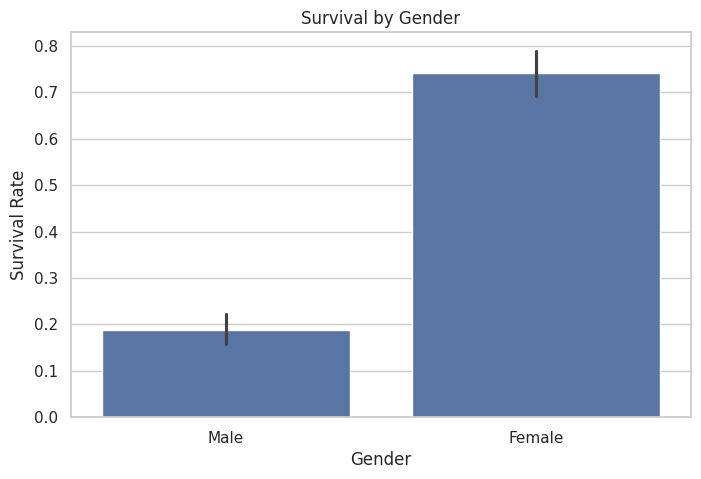

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Gender and Survival
plt.figure(figsize=(8, 5))
sns.barplot(x="Sex", y="Survived", data=titanic_data)
plt.title("Survival by Gender")
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()


The bar plot shows the survival rate by gender. It's clear that females had a significantly higher survival rate compared to males on the Titanic. This is a well-documented historical fact, reflecting the "women and children first" protocol used in lifeboat loading.

Next, let's examine how passenger class (Pclass) is related to survival. This will give us insight into the social-economic dimension of survival on the Titanic.

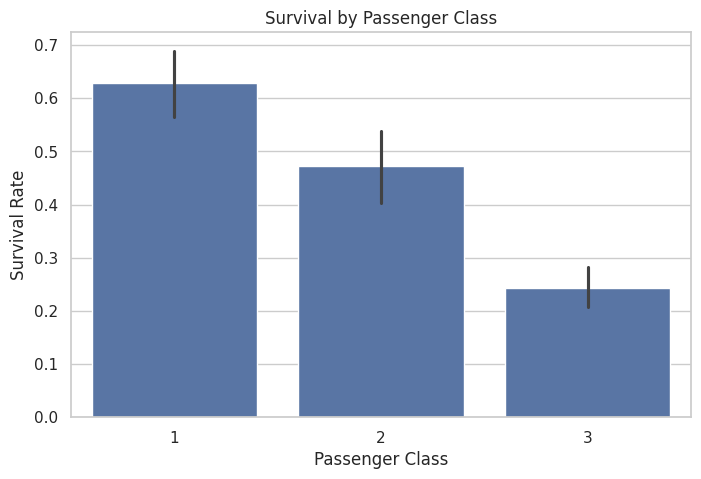

In [19]:
# Passenger Class and Survival
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=titanic_data)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


The bar plot illustrates the survival rate by passenger class. We observe a clear trend: passengers in higher classes (particularly the 1st class) had a higher survival rate. This trend may reflect several factors, including the location of cabins on the ship and access to lifeboats.

Now, let's consider age and fare. For these continuous variables, we'll use different types of plots:

- **Age:** We'll create a histogram to see the distribution of ages among survivors and non-survivors.
- **Fare:** We'll use a box plot to understand how fare varies with survival status.

Let's start with the age distribution.

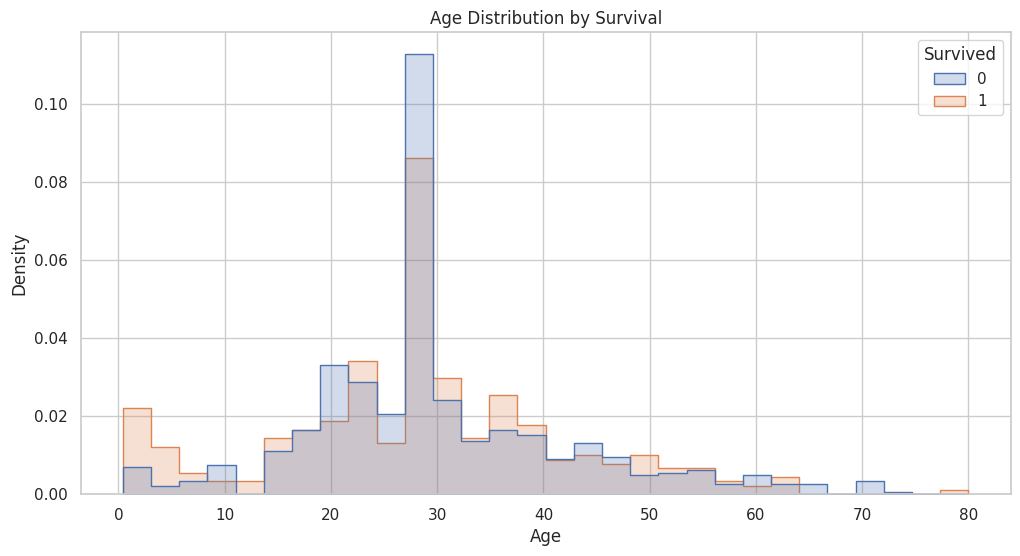

In [20]:
# Age and Survival
plt.figure(figsize=(12, 6))
sns.histplot(titanic_data, x="Age", hue="Survived", element="step", stat="density", common_norm=False)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


The histogram shows the age distribution for survivors and non-survivors. A few points to note:

1. There's a noticeable peak for younger passengers (particularly children) among the survivors, indicating a higher survival rate for this age group.
   
2. The age distribution for non-survivors appears to be more spread out, with a higher proportion in the adult age range.
 
This analysis suggests that age was a factor in survival, with children being more likely to survive.

Next, let's analyze the fare distribution with respect to survival status.

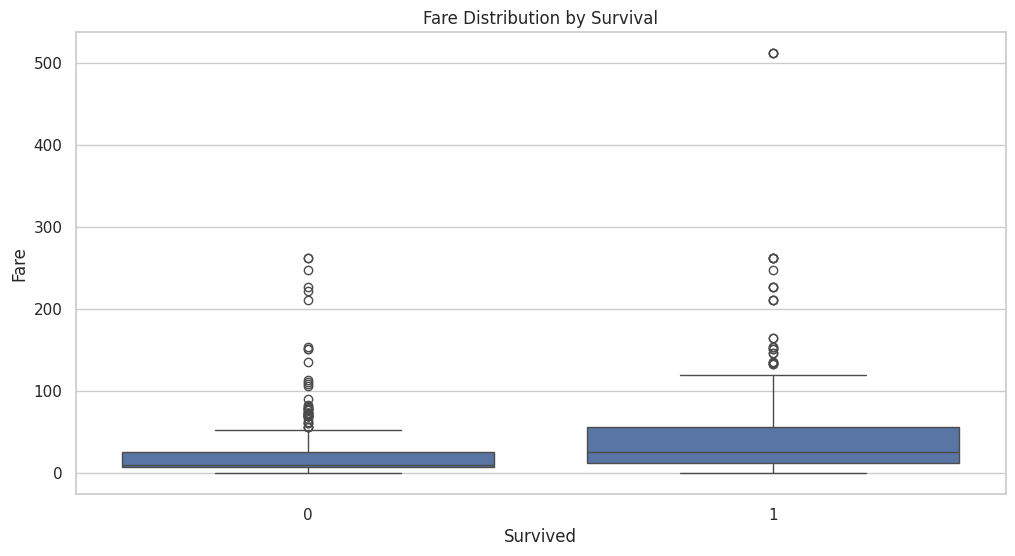

In [21]:
# Fare and Survival
plt.figure(figsize=(12, 6))
sns.boxplot(x="Survived", y="Fare", data=titanic_data)
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()


The box plot shows the distribution of fares for survivors and non-survivors. Here's what we can interpret:

1. **Higher Median Fare for Survivors:** The median fare for survivors is higher than for non-survivors. This observation aligns with our earlier finding that passengers in higher classes (who likely paid more for their tickets) had a higher survival rate.

2. **Outliers:**  There are several outliers in the fare, especially among survivors. This indicates that a few passengers paid significantly higher fares.


## Logistic Regression Modeling
Now, let's move on to building a logistic regression model. Logistic regression is a good starting point for binary classification problems like this one. We'll first prepare our data for modeling, then fit a logistic regression model, and finally evaluate its performance.

We'll start by selecting our features for the model and splitting the data into a training set and a test set. We'll use the 'Sex', 'Age', 'Pclass', and 'Fare' features for our model. Since you mentioned encountering an overfitting issue in R, we'll also be mindful of that when evaluating our model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Selecting features and target variable
features = ['Sex', 'Age', 'Pclass', 'Fare']
X = titanic_data[features]
y = titanic_data['Survived']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

conf_matrix, class_report


(array([[134,  23],
        [ 32,  79]]),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.85      0.83       157\n           1       0.77      0.71      0.74       111\n\n    accuracy                           0.79       268\n   macro avg       0.79      0.78      0.79       268\nweighted avg       0.79      0.79      0.79       268\n')

The logistic regression model has been trained and evaluated. Here are the results:

1. Confusion Matrix:

- True negatives (correctly predicted non-survivors): 134
- False positives (non-survivors incorrectly predicted as survivors): 23
- False negatives (survivors incorrectly predicted as non-survivors): 32
- True positives (correctly predicted survivors): 79

2. Classification Report:

- Precision (amongst all predicted as survivors, how many were actual survivors): 0.77
- Recall (amongst all actual survivors, how many we predicted correctly): 0.71
- F1-Score (harmonic mean of precision and recall): 0.74 for survivors, 0.83 for non-survivors
- Accuracy (overall, how often the model is correct): 0.79


These metrics suggest a reasonably good model performance, with a balance between precision and recall. The accuracy is **79%**, which is a decent starting point for this kind of model.



## Gradient Boosting Modeling
Next, let's build a gradient boosting model for comparison. Gradient boosting is a powerful technique that builds on weak models.

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Selecting features and target variable
features = ['Sex', 'Age', 'Pclass', 'Fare']
X = titanic_data[features]
y = titanic_data['Survived']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting the hyperparameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

# Training the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Making predictions on the test set
y_pred = model.predict(dtest)
y_pred_binary = [round(value) for value in y_pred]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

0.8097014925373134

The Gradient Boosting method has been trained and evaluated. The accuracy of the model on the test set is 0.809. This means that the model correctly predicted the target variable for 81% of the observations in the test set. This is a good accuracy score, but it can still be improved. We can try tuning the parameters of the model or using a different model to see if we can get a higher accuracy score. 

Next, we will look at some other metrics and compare the performance of the Gradient Boosting model to other models to get a better understanding of its effectiveness. Below we calculate the confusion matrix and a classification report. 

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Calculating precision, recall, and F1 score
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)

Confusion Matrix:
[[136  21]
 [ 30  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



Interpreting the results:

1. Confusion Matrix:
   
- True Negatives: 136
- False Postives:  21
- False Negatives: 30
- True Positives: 81

2. Classification Report: 

- Precision: non-survivor 0.82 / survivor 0.79
- Recall: non-survivor 0.87 / survivor 0.73
- F1-Score: non-survivor 0.84 / survivor 0.76
- Accuracy: 81%


Interpretation:

The model correctly predicted 136 fatalities and 81 survivors. However, it incorrectly classified 21 fatalities as survivors and 30 survivors as fatalities. The overall accuracy of the model is 81%, which means that it correctly classified 81% of the total passengers.

The precision of the model is 0.79, which means that out of all the passengers predicted as survivors, 79% were actually survivors. The recall of the model is 0.73, which means that out of all the survivors, the model correctly identified 73% of them.

The F1-score is a harmonic mean of precision and recall, and it is a good measure of overall performance. In this case, the F1-score is 0.76, which indicates a decent balance between precision and recall.

Overall, the model has a decent performance with an accuracy of 81%. It performed slightly better than the Linear Regression model. However, it may benefit from further improvements to reduce the number of false positives and false negatives.
